In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated.csv"
data = pd.read_csv(data_path)

Exracting Google Meet Average meeting minutes related metrics

In [2]:
Meetingminavg = data[["google.meet:average_meeting_minutes","time","date","year","month"]].rename(columns = {"google.meet:average_meeting_minutes": "AvgMeetingMinutes"}) 
Meetingminavg.head(10)

,AvgMeetingMinutes,time,date,year,month
0,0.0,2018-01-14T00:00:00.000-0500,2018-01-14,2018,1
1,0.0,2018-01-15T00:00:00.000-0500,2018-01-15,2018,1
2,0.0,2018-01-16T00:00:00.000-0500,2018-01-16,2018,1
3,0.0,2018-01-17T00:00:00.000-0500,2018-01-17,2018,1
4,0.0,2018-01-18T00:00:00.000-0500,2018-01-18,2018,1
5,0.0,2018-01-19T00:00:00.000-0500,2018-01-19,2018,1
6,0.0,2018-01-20T00:00:00.000-0500,2018-01-20,2018,1
7,0.0,2018-01-21T00:00:00.000-0500,2018-01-21,2018,1
8,0.0,2018-01-22T00:00:00.000-0500,2018-01-22,2018,1
9,0.0,2018-01-23T00:00:00.000-0500,2018-01-23,2018,1


Shape Of Data

In [3]:
Meetingminavg.shape

(543, 5)

Value counts is used to find the number of observations with metric value as 0,1,..
There are 160 observations with metric value as 0

In [4]:
counts = Meetingminavg.AvgMeetingMinutes.value_counts()
counts.head(10)

0.0     160
37.0     16
34.0     16
40.0     15
31.0     15
43.0     15
26.0     14
42.0     14
35.0     14
36.0     13
Name: AvgMeetingMinutes, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [6]:
mask = (Meetingminavg.AvgMeetingMinutes< 0)
Meetingminavg[mask].head()

,AvgMeetingMinutes,time,date,year,month


Sorting using metric values in ascending order.

In [7]:
Meetingminavg.AvgMeetingMinutes.sort_values().head(10)

0      0.0
103    0.0
104    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
102    0.0
111    0.0
Name: AvgMeetingMinutes, dtype: float64

describe is used to get some useful information like number of metric values and least, highest metric value

In [8]:
Meetingminavg.AvgMeetingMinutes.describe()

count    541.000000
mean      28.055453
std       24.917134
min        0.000000
25%        0.000000
50%       30.000000
75%       41.000000
max      174.000000
Name: AvgMeetingMinutes, dtype: float64

Maximum number of Average_meeting_minutes

In [9]:
Meetingminavg.loc[Meetingminavg.AvgMeetingMinutes.idxmax()]

AvgMeetingMinutes                             174
time                 2018-12-09T00:00:00.000-0500
date                                   2018-12-09
year                                         2018
month                                          12
Name: 305, dtype: object

Minimun value in dataframe

In [10]:
Meetingminavg.loc[Meetingminavg.AvgMeetingMinutes.idxmin()]

AvgMeetingMinutes                               0
time                 2018-01-14T00:00:00.000-0500
date                                   2018-01-14
year                                         2018
month                                           1
Name: 0, dtype: object

In [11]:
Meetingminavg.groupby(['AvgMeetingMinutes', 'date' , 'time' , 'year','month']).count().tail(10)

,,,,
AvgMeetingMinutes,date,time,year,month
98.0,2018-10-06,2018-10-06T00:00:00.000-0400,2018,10
99.0,2018-11-10,2018-11-10T00:00:00.000-0500,2018,11
101.0,2018-12-02,2018-12-02T00:00:00.000-0500,2018,12
112.0,2018-06-03,2018-06-03T00:00:00.000-0400,2018,6
120.0,2019-05-04,2019-05-04T00:00:00.000-0400,2019,5
124.0,2019-07-21,2019-07-21T00:00:00.000-0400,2019,7
129.0,2018-11-25,2018-11-25T00:00:00.000-0500,2018,11
131.0,2019-04-13,2019-04-13T00:00:00.000-0400,2019,4
167.0,2018-12-10,2018-12-10T00:00:00.000-0500,2018,12


Number of observations for each year

In [12]:
Meetingminavg.year.value_counts()

2018    328
2019    215
Name: year, dtype: int64

Number of observations for each month

In [13]:
Meetingminavg.month.value_counts()

4     60
3     60
6     54
5     54
2     53
7     51
1     49
8     41
12    31
10    31
11    30
9     29
Name: month, dtype: int64

In [14]:
Meetingminavg['AvgMeetingMinutes'].quantile(0)

0.0

Median of metric values

In [15]:
Meetingminavg['AvgMeetingMinutes'].quantile(0.5)

30.0

Highest Metric values are around 174. Highest Average number of meetings in a day is 174

In [16]:
Meetingminavg['AvgMeetingMinutes'].quantile(1.0)

174.0

Mean value is less than Median as we have major outliers in the lower end as well

In [17]:
Meetingminavg['AvgMeetingMinutes'].mean()

28.055452865064694

Mode of metric values. Average meeting minutes are zero for most of the days

In [18]:
Meetingminavg['AvgMeetingMinutes'].mode()

0    0.0
dtype: float64

Quartile

minimum value (0th percentile),
first quartile (25th percentile),
the median - second quartile (50th percentile),
third quartile(75th percentile), and
maximum value (100th percentile)
using the quantile() function:

In [19]:
five_num = [Meetingminavg['AvgMeetingMinutes'].quantile(0),   
            Meetingminavg['AvgMeetingMinutes'].quantile(0.25),
            Meetingminavg['AvgMeetingMinutes'].quantile(0.50),
            Meetingminavg['AvgMeetingMinutes'].quantile(0.75),
            Meetingminavg['AvgMeetingMinutes'].quantile(1)]

five_num

[0.0, 0.0, 30.0, 41.0, 174.0]

Interquartile (IQR) range - distance between the 3rd quartile and the 1st quartile

In [20]:
Meetingminavg['AvgMeetingMinutes'].quantile(0.75) - Meetingminavg['AvgMeetingMinutes'].quantile(0.25)

41.0

Box plots based on Year

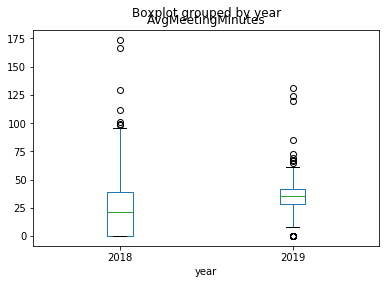

In [27]:
Meetingminavg.boxplot(by ='year', column =['AvgMeetingMinutes'], grid = False) 

The variance of a distribution is the average of the squared deviations (differences) from the mean.

In [28]:
Meetingminavg['AvgMeetingMinutes'].var()

620.8635859519409

Standard Deviation - square root of the variance.

In [29]:
Meetingminavg['AvgMeetingMinutes'].std()

24.917134384835286

Variance and Standard Deviation are not the right measures of spread as our data is having outlier values. So, they are susceptible to the influence of data skew and outliers as both of them are derived from the mean.

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median

Median absolute deviation is the right measure of spread for AverageMeetingMinutes metric

In [30]:
abs_median_devs = abs(Meetingminavg['AvgMeetingMinutes']- Meetingminavg['AvgMeetingMinutes'].median())

abs_median_devs.median() * 1.4826

20.7564